Epoch 1/60, Loss: 19.7896
Epoch 2/60, Loss: 22.8833
Epoch 3/60, Loss: 7.3524
Epoch 4/60, Loss: 19.6101
Epoch 5/60, Loss: 3.2485
Epoch 6/60, Loss: 13.4724
Epoch 7/60, Loss: 2.9165
Epoch 8/60, Loss: 7.5856
Epoch 9/60, Loss: 3.3476
Epoch 10/60, Loss: 3.4713
Epoch 11/60, Loss: 3.2878
Epoch 12/60, Loss: 1.2680
Epoch 13/60, Loss: 2.6335
Epoch 14/60, Loss: 0.4177
Epoch 15/60, Loss: 1.7324
Epoch 16/60, Loss: 0.2535
Epoch 17/60, Loss: 0.9278
Epoch 18/60, Loss: 0.3003
Epoch 19/60, Loss: 0.3864
Epoch 20/60, Loss: 0.3293
Epoch 21/60, Loss: 0.1100
Epoch 22/60, Loss: 0.2878
Epoch 23/60, Loss: 0.0167
Epoch 24/60, Loss: 0.2040
Epoch 25/60, Loss: 0.0133
Epoch 26/60, Loss: 0.1194
Epoch 27/60, Loss: 0.0342
Epoch 28/60, Loss: 0.0584
Epoch 29/60, Loss: 0.0478
Epoch 30/60, Loss: 0.0256
Epoch 31/60, Loss: 0.0476
Epoch 32/60, Loss: 0.0136
Epoch 33/60, Loss: 0.0384
Epoch 34/60, Loss: 0.0124
Epoch 35/60, Loss: 0.0270
Epoch 36/60, Loss: 0.0141
Epoch 37/60, Loss: 0.0178
Epoch 38/60, Loss: 0.0151
Epoch 39/60, Loss

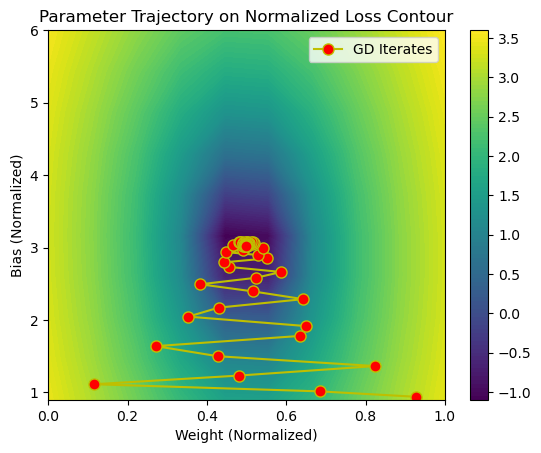

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
torch.manual_seed(0)
X = torch.randn(100, 1) * 10
y = 0.5 * X + 3 + 0.1*torch.randn(100, 1)

# Normalize the data
#X_mean, X_std = X.mean(), X.std()
#y_mean, y_std = y.mean(), y.std()
X_normalized = X #- X_mean) / X_std
y_normalized = y #- y_mean) / y_std

# Model definition
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

# Training loop with parameter recording
def train(model, criterion, optimizer, epochs):
    w, b = [], []
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_normalized)
        loss = criterion(outputs, y_normalized)
        loss.backward()
        optimizer.step()

        # Record parameters and loss
        w.append(model.linear.weight.item())
        b.append(model.linear.bias.item())
        losses.append(loss.item())
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
    
    return w, b, losses

w, b, losses = train(model, criterion, optimizer, 60)

# Contour plot settings
W = np.linspace(0, 1, 10)
B = np.linspace(0.9, 6, 10)
W, B = np.meshgrid(W, B)
Z = np.array([[criterion(X_normalized * w + b, y_normalized).item() for w, b in zip(W_row, B_row)] for W_row, B_row in zip(W, B)])

plt.contourf(W, B, np.log(Z + 1e-9), levels=100, cmap='viridis')
plt.colorbar()
plt.plot(w, b, 'yo-', markersize=8, markerfacecolor='red', label='GD Iterates')  # Enhanced trajectory
plt.title('Parameter Trajectory on Normalized Loss Contour')
plt.xlabel('Weight (Normalized)')
plt.ylabel('Bias (Normalized)')
plt.legend()
plt.show()
